In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [2]:
import pickle

# Load preprocessed data
with open("maestro_sequences.pkl", "rb") as f:
    sequences = pickle.load(f)

# Check if sequences are loaded
print(f"Number of sequences: {len(sequences)}")

# Prepare input (X) and output (y) data
seq_length = 50
def create_training_data(sequences, seq_length=100):
    X, y = [], []
    for seq in sequences:
        for i in range(len(seq) - seq_length):
            X.append(seq[i:i + seq_length])
            y.append(seq[i + seq_length])
    return np.array(X), np.array(y)

X, y = create_training_data(sequences, seq_length)

# Split the dataset into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
print("Training input shape:", X_train.shape)
print("Validation input shape:", X_val.shape)
print("Training output shape:", y_train.shape)
print("Validation output shape:", y_val.shape)


Number of sequences: 1276
Training input shape: (51040, 50)
Validation input shape: (12760, 50)
Training output shape: (51040,)
Validation output shape: (12760,)


In [3]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Save the best model during training
checkpoint = ModelCheckpoint(
    filepath='rnn_music_best_model.keras',  # Use `.keras` extension
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

# Early stopping to terminate training if validation loss does not improve
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)


In [4]:
from tensorflow.keras.models import model_from_json

# Load the model architecture
with open("rnn_model_architecture.json", "r") as json_file:
    model_json = json_file.read()

# Recreate the model from the architecture
model = model_from_json(model_json)

2024-12-27 13:34:58.694006: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-12-27 13:34:58.694046: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-27 13:34:58.694055: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-27 13:34:58.694078: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-27 13:34:58.694093: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,            # Adjust based on your dataset size and training needs
    batch_size=64,        # Adjust for memory capacity
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/50


2024-12-27 13:35:00.478290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


798/798 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0350 - loss: 4.0617
Epoch 1: val_loss improved from inf to 4.00650, saving model to rnn_music_best_model.keras
798/798 ━━━━━━━━━━━━━━━━━━━━ 38s 46ms/step - accuracy: 0.0350 - loss: 4.0616 - val_accuracy: 0.0404 - val_loss: 4.0065
Epoch 2/50
798/798 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0315 - loss: 3.9998
Epoch 2: val_loss did not improve from 4.00650
798/798 ━━━━━━━━━━━━━━━━━━━━ 37s 46ms/step - accuracy: 0.0315 - loss: 3.9998 - val_accuracy: 0.0359 - val_loss: 4.0253
Epoch 3/50
798/798 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0322 - loss: 4.0090
Epoch 3: val_loss improved from 4.00650 to 3.96523, saving model to rnn_music_best_model.keras
798/798 ━━━━━━━━━━━━━━━━━━━━ 37s 46ms/step - accuracy: 0.0322 - loss: 4.0090 - val_accuracy: 0.0380 - val_loss: 3.9652
Epoch 4/50
798/798 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0352 - loss: 3.9806
Epoch 4: val_loss did not improve from 3.96523
798/798 ━━━━━━━━━━━━━━━━━━

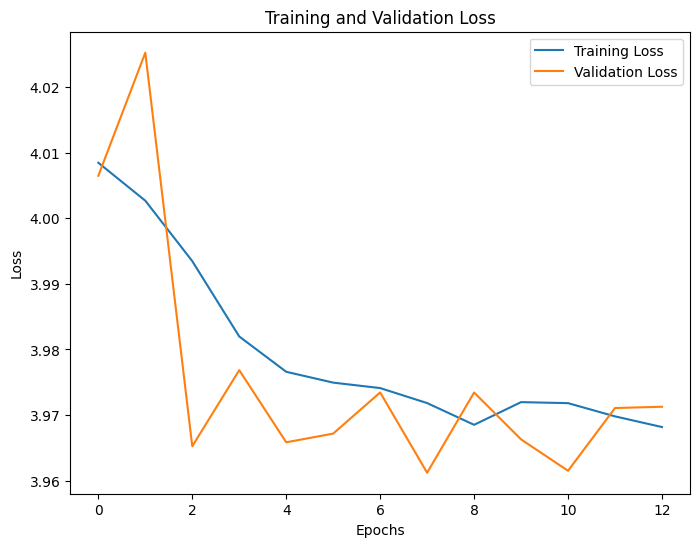

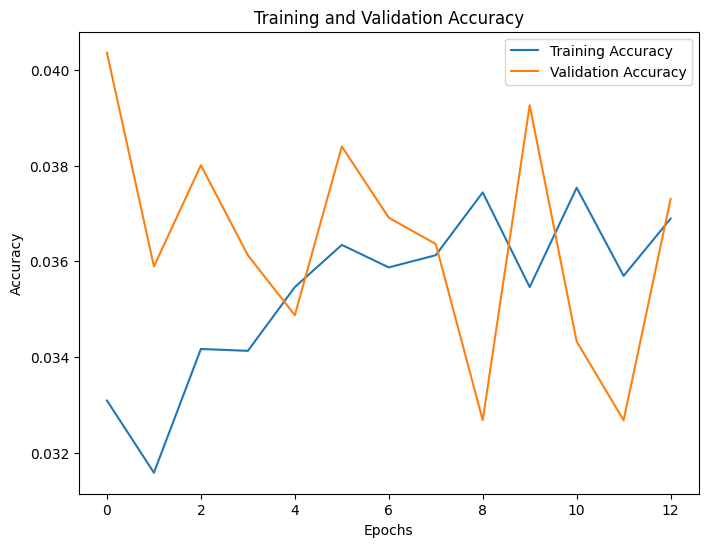

In [6]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [7]:
# Save the final model
model.save('rnn_music_final_model.h5')

print("Model saved successfully!")


Model saved successfully!


In [10]:
# Load the best model
best_model = tf.keras.models.load_model('rnn_music_best_model.keras')

# Evaluate on the validation set
val_loss, val_accuracy = best_model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.0359 - loss: 3.9574
Validation Loss: 3.961190938949585
Validation Accuracy: 0.036363635212183


In [20]:
import numpy as np
import pretty_midi
from tensorflow.keras.models import load_model


In [21]:
# Load the trained model
model = load_model('rnn_music_best_model.keras')

# Confirm model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 50, 256)        │        32,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50, 512)        │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 512)            │     2,099,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,613,314 (44.30 MB)

 Trainable params: 3,871,104 (14.77 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,742,210 (29.53 MB)

In [22]:
def generate_music(model, start_sequence, seq_length=100, output_length=500, temperature=1.0):
    """
    Generate a sequence of MIDI notes using the trained model.
    Args:
        model (tf.keras.Model): Trained RNN model.
        start_sequence (list): Initial sequence of notes to seed the generation.
        seq_length (int): Length of the input sequence.
        output_length (int): Desired length of the generated sequence.
        temperature (float): Sampling temperature to control randomness.
    Returns:
        list: Generated sequence of MIDI notes.
    """
    generated = list(start_sequence)  # Start with the seed sequence
    for _ in range(output_length):
        # Prepare input for the model
        input_seq = np.expand_dims(generated[-seq_length:], axis=0)
        
        # Predict probabilities for the next note
        predictions = model.predict(input_seq, verbose=0)[0]
        
        # Apply temperature for more diverse generation
        predictions = np.log(predictions + 1e-8) / temperature
        predictions = np.exp(predictions) / np.sum(np.exp(predictions))
        
        # Sample the next note
        next_note = np.random.choice(range(len(predictions)), p=predictions)
        generated.append(next_note)
    
    return generated


In [24]:
# Define a seed sequence (use part of your validation data or a custom sequence)
start_sequence = X_val[0][:seq_length]  # Use the first sequence from validation data

# Generate a new sequence
generated_sequence = generate_music(model, start_sequence, seq_length=20, output_length=300, temperature=0.6)

# Display the generated sequence
print("Generated sequence:", generated_sequence[:20])  # Print the first 20 notes


Generated sequence: [69, 70, 65, 74, 77, 73, 74, 70, 83, 46, 83, 50, 53, 58, 46, 50, 53, 58, 46, 82]


In [25]:
def sequence_to_midi(sequence, output_file, instrument_program=0):
    """
    Convert a sequence of notes into a MIDI file with a specified instrument.
    Args:
        sequence (list): Sequence of MIDI note pitches.
        output_file (str): File path to save the MIDI file.
        instrument_program (int): MIDI program number for the desired instrument.
    """
    midi = pretty_midi.PrettyMIDI()
    instrument = pretty_midi.Instrument(program=instrument_program)  # Custom instrument
    
    # Add notes to the instrument
    start_time = 0
    duration = 0.5  # Fixed duration for simplicity
    for pitch in sequence:
        note = pretty_midi.Note(velocity=100, pitch=int(pitch), start=start_time, end=start_time + duration)
        instrument.notes.append(note)
        start_time += duration
    
    # Add the instrument to the MIDI file and write it
    midi.instruments.append(instrument)
    midi.write(output_file)
    print(f"MIDI file saved as {output_file}")


In [26]:
# Define a starting sequence (use part of validation data or custom sequence)
start_sequence = X_val[0][:100]  # Use the first sequence from validation data

# Generate a new music sequence
generated_sequence = generate_music(model, start_sequence, seq_length=100, output_length=500, temperature=1.4)

# Save the generated sequence to a MIDI file with a different instrument
# Example: 27 is Electric Guitar (Clean), 40 is Violin
sequence_to_midi(generated_sequence, "generated_guitar_music.mid", instrument_program=27)  # Electric Guitar
sequence_to_midi(generated_sequence, "generated_violin_music.mid", instrument_program=40)  # Violin


MIDI file saved as generated_guitar_music.mid
MIDI file saved as generated_violin_music.mid
